In [1]:
import os
import keras

os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.6

In [8]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.6573 - accuracy: 0.7648 - val_loss: 2.0040 - val_accuracy: 0.4789
Epoch 50/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.6551 - accuracy: 0.7636 - val_loss: 2.1533 - val_accuracy: 0.4720
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

50000/50000 [==============================] - 5s 101us/step - loss: 0.9608 - accuracy: 0.6610 - val_loss: 1.3820 - val_accuracy: 0.5186
Epoch 47/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.9421 - accuracy: 0.6679 - val_loss: 1.3837 - val_accuracy: 0.5305
Epoch 48/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.9371 - accuracy: 0.6724 - val_loss: 1.3709 - val_accuracy: 0.5267
Epoch 49/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.9277 - accuracy: 0.6746 - val_loss: 1.4664 - val_accuracy: 0.5104
Epoch 50/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.9185 - accuracy: 0.6782 - val_loss: 1.3317 - val_accuracy: 0.5346
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_______________________

Epoch 44/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5406 - accuracy: 0.4635 - val_loss: 1.5608 - val_accuracy: 0.4499
Epoch 45/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5361 - accuracy: 0.4639 - val_loss: 1.5569 - val_accuracy: 0.4535
Epoch 46/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5316 - accuracy: 0.4661 - val_loss: 1.5590 - val_accuracy: 0.4489
Epoch 47/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5270 - accuracy: 0.4665 - val_loss: 1.5528 - val_accuracy: 0.4571
Epoch 48/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5222 - accuracy: 0.4693 - val_loss: 1.5483 - val_accuracy: 0.4557
Epoch 49/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5177 - accuracy: 0.4699 - val_loss: 1.5478 - val_accuracy: 0.4533
Epoch 50/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5134 - accuracy: 0.4700 - 

Epoch 42/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.9330 - accuracy: 0.3287 - val_loss: 1.9310 - val_accuracy: 0.3277
Epoch 43/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.9290 - accuracy: 0.3303 - val_loss: 1.9271 - val_accuracy: 0.3278
Epoch 44/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.9251 - accuracy: 0.3319 - val_loss: 1.9233 - val_accuracy: 0.3284
Epoch 45/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.9214 - accuracy: 0.3326 - val_loss: 1.9196 - val_accuracy: 0.3303
Epoch 46/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.9178 - accuracy: 0.3339 - val_loss: 1.9161 - val_accuracy: 0.3314
Epoch 47/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.9142 - accuracy: 0.3350 - val_loss: 1.9126 - val_accuracy: 0.3314
Epoch 48/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.9108 - accuracy: 0.3368 - 

Epoch 40/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.2117 - accuracy: 0.2138 - val_loss: 2.2100 - val_accuracy: 0.2133
Epoch 41/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.2098 - accuracy: 0.2154 - val_loss: 2.2082 - val_accuracy: 0.2145
Epoch 42/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.2079 - accuracy: 0.2161 - val_loss: 2.2063 - val_accuracy: 0.2165
Epoch 43/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.2061 - accuracy: 0.2174 - val_loss: 2.2045 - val_accuracy: 0.2180
Epoch 44/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.2042 - accuracy: 0.2192 - val_loss: 2.2026 - val_accuracy: 0.2194
Epoch 45/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.2024 - accuracy: 0.2205 - val_loss: 2.2008 - val_accuracy: 0.2203
Epoch 46/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.2006 - accuracy: 0.2221 - v

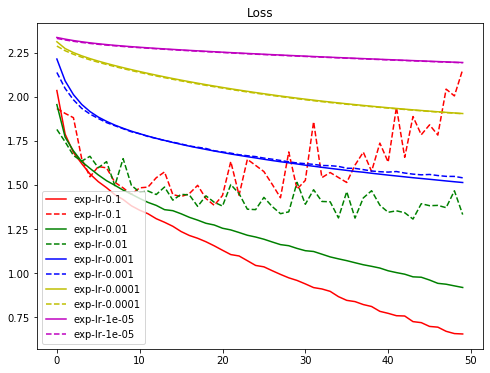

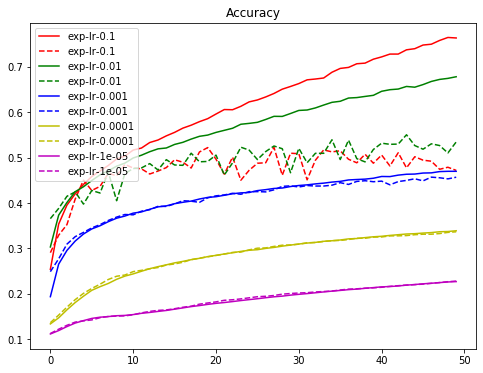

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()